Projekt zaliczeniowy - <b>Python</b> - insideairbnb<br>
Wybrany zestaw danych dla miasta: <b>Zurich</b><br><br>
_Autor: <b>Paulina Zapletal</b>_<br><br>

#### Zaimportowanie wybranych bibliotek i/lub ich komponentów

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.metrics import r2_score
import matplotlib.ticker as mtick
import seaborn as sns

#### Pobranie zestawu surowych danych ze źródła internetowego oraz ustawienie wyświetlania i formatu

In [307]:
# załadowanie danych ze źródła internetowego
data_zu = pd.read_csv(r'http://data.insideairbnb.com/switzerland/z%C3%BCrich/zurich/2021-12-28/data/listings.csv.gz', sep = ',', engine = 'python')

# zmiana ustawień wyświetlania
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:20,.2f}'.format

#### Wyświetlenie informacji o zbiorze danych oraz próbki surowych danych

In [308]:
# poznanie rozmiaru zbioru danych
data_zu.info()
# liczba elementów w dataframe
print("\n\nLiczba elementów w zbiorze: {}".format(data_zu.size))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1860 non-null   int64  
 1   listing_url                                   1860 non-null   object 
 2   scrape_id                                     1860 non-null   int64  
 3   last_scraped                                  1860 non-null   object 
 4   name                                          1859 non-null   object 
 5   description                                   1789 non-null   object 
 6   neighborhood_overview                         967 non-null    object 
 7   picture_url                                   1860 non-null   object 
 8   host_id                                       1860 non-null   int64  
 9   host_url                                      1860 non-null   o

In [309]:
# wyświetlenie próbki surowych danych
data_zu.head(7)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,73282,https://www.airbnb.com/rooms/73282,20211228000812,2021-12-28,"Clean, central, quiet",Arty neighborhood<br /><br /><b>The space</b><...,NaN,https://a0.muscache.com/pictures/481072/abd94c...,377532,https://www.airbnb.com/users/show/377532,Simona,2011-02-04,"Zurich, Zurich, Switzerland",I am from Italy and have lived in Zurich for a...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/377532/profil...,https://a0.muscache.com/im/users/377532/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Sihlfeld,Kreis 3,47.37,8.52,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.00,1.00,"[""Hot tub"", ""Heating"", ""Elevator"", ""Dryer"", ""C...",$100.00,3,1825,3.00,3.00,"1,825.00","1,825.00",3.00,"1,825.00",NaN,t,0,0,0,56,2021-12-28,49,0,0,2012-05-19,2019-04-27,4.78,4.87,4.80,4.84,4.93,4.71,4.61,NaN,f,1,1,0,0,0.42
1,86645,https://www.airbnb.com/rooms/86645,20211228000812,2021-12-28,Stadium Letzigrund - by Airhome,Discover a boutique apartment presented by Air...,Located 300 meters to Zurich Letzigrund Stadio...,https://a0.muscache.com/pictures/miso/Hosting-...,475053,https://www.airbnb.com/users/show/475053,James,2011-03-31,Wherever you need me. Always happy to help.,Backed by an international team of guest suppo...,within an hour,98%,94%,t,https://a0.muscache.com/im/users/475053/profil...,https://a0.muscache.com/im/users/475053/profil...,NaN,36,36,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Zurich, Switzerland",Sihlfeld,Kreis 3,47.38,8.50,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.00,2.00,"[""Fire extinguisher"", ""Air conditioning"", ""Ind...",$195.00,1,9999,1.00,1.00,"9,999.00","9,999.00",1.00,"9,999.00",NaN,t,0,0,0,0,2021-12-28,50,1,0,2011-06-10,2021-07-16,4.52,4.67,4.70,4.64,4.77,4.60,4.47,NaN,t,18,18,0,0,0.39
2,143821,https://www.airbnb.com/rooms/143821,20211228000812,2021-12-28,marvelous LOFT in SIHLCITY Zürich,<b>The space</b><br />- 2.5 rooms on 2 floors ...,NaN,https://a0.muscache.com/pictures/1012249/a4f34...,697307,https://www.airbnb.com/users/show/697307,Erhan,2011-06-13,"Zürich, Zurich, Switzerland",Hello everyone!\n\ni am living in Zurich.\n\nh...,within a day,100%,0%,f,https://a0.muscache.com/im/users/697307/profil...,https://a0.muscache.com/im/users/697307/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Alt-Wiedikon,Kreis 3,47.36,8.52,Entire loft,Entire home/apt,2,NaN,1.5 baths,1.00,2.00,"[""Stove"", ""Bed linens"", ""Elevator"", ""Microwave...",$200.00,3,365,3.00,3.00,365.00,365.00,3.00,365.00,NaN,t,27,57,87,362,2021-12-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,178448,https://www.airbnb.com/rooms/178448,20211228000812,2021-12-2

#### Pokazanie poszczególnych charakterystyk dla danych numerycznych i kategorycznych przed czyszczeniem zestawu danych

In [310]:
# analiza zmiennych numerycznych przed czyszczeniem

data_zu.describe()

# count = zliczanie
# mean = średnia
# std = odchylenie standardowe
# min = wartość minimalna
# 25% = dolny kwartyl
# 50% = mediana
# 75% = górny kwartyl
# max = wartość maksymalna

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,"1,860.00","1,860.00","1,860.00","1,860.00","1,860.00","1,860.00","1,860.00","1,860.00",0.00,"1,583.00","1,798.00","1,860.00","1,860.00","1,859.00","1,859.00","1,859.00","1,859.00","1,859.00","1,859.00",0.00,"1,860.00","1,860.00","1,860.00","1,860.00","1,860.00","1,860.00","1,860.00","1,485.00","1,471.00","1,471.00","1,471.00","1,471.00","1,471.00","1,471.00",0.00,"1,860.00","1,860.00","1,860.00","1,860.00","1,485.00"
mean,"31,857,990.85","20,211,228,000,812.16","91,887,924.46",17.25,17.25,47.38,8.53,2.66,NaN,1.30,1.58,7.97,695.65,7.09,11.53,764.68,"1,156,008.47",10.87,"3,434.17",NaN,11.90,26.46,42.29,150.27,27.01,5.55,0.51,4.69,4.76,4.74,4.84,4.82,4.80,4.62,NaN,12.19,11.12,1.04,0.02,1.01
std,"16,694,156.30",0.16,"120,816,447.65",41.21,41.21,0.02,0.02,1.59,NaN,0.67,1.04,24.09,547.57,23.45,51.00,534.42,"49,806,956.36",49.11,"113,203.19",NaN,11.87,23.81,35.95,139.53,58.85,11.70,1.30,0.61,0.47,0.39,0.38,0.39,0.31,0.44,NaN,23.73,24.03,2.48,0.22,1.43
min,"73,282.00","20,211,228,000,812.00","14,288.00",0.00,0.00,47.33,8.47,0.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,0.00,0.00,0.00,0.01
25%,"16,872,922.00","20,211,228,000,812.00","12,886,487.00",1.00,1.00,47.36,8.52,2.00,NaN,1.00,1.00,1.00,87.25,1.00,2.00,120.00,365.00,2.00,365.00,NaN,0.00,0.00,0.00,13.00,1.00,0.00,0.00,4.63,4.73,4.64,4.82,4.80,4.71,4.50,NaN,1.00,0.00,0.00,0.00,0.18
50%,"35,804,286.50","20,211,228,000,812.00","25,444,534.50",1.00,1.00,47.38,8.53,2.00,NaN,1.00,1.00,3.00,"1,125.00",2.00,3.00,"1,125.00","1,125.00",3.00,"1,125.00",NaN,9.00,25.00,39.00,90.00,5.00,1.00,0.00,4.83,4.90,4.85,4.95,4.95,4.89,4.71,NaN,2.00,1.00,0.00,0.00,0.48
75%,"46,529,064.50","20,211,228,000,812.00","131,179,276.50",8.00,8.00,47.39,8.55,4.00,NaN,1.00,2.00,5.00,"1,125.00",5.00,7.00,"1,125.00","1,125.00",6.00,"1,125.00",NaN,24.00,53.00,82.00,304.00,23.25,5.00,0.00,5.00,5.00,5.00,5.00,5.00,5.00,4.90,NaN,8.00,6.00,1.00,0.00,1.19
max,"54,012,373.00","20,211,228,000,812.00","436,738,809.00",175.00,175.00,47.43,8.60,16.00,NaN,7.00,10.00,365.00,"9,999.00",365.00,730.00,"9,999.00","2,147,483,647.00",710.20,"4,881,641.70",NaN,30.00,60.00,90.00,365.00,811.00,172.00,20.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,91.00,91.00,18.00,3.00,15.14


In [311]:
# zliczanie danych brakujących lub nienumerycznych
data_zu.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
description                                       71
neighborhood_overview                            893
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      2
host_about                                       662
host_response_time                               374
host_response_rate                               374
host_acceptance_rate                             240
host_is_superhost                                  0
host_thumbnail_url                            

In [312]:
# analiza zmiennych kategorycznych przed czyszczeniem

data_zu.select_dtypes(include=['object']).describe()

# count = zliczanie
# unique = liczba wartości unikatowych
# top = najczęściej występująca wartośc
# freq = częstotliwość najczęściej występującej wartość

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,1860,1860,1859,1789,967,1860,1860,1860,1860,1858,1198,1486,1486,1620,1860,1860,1860,22,1860,1860,1860,967,1860,1860,1860,1860,1856,1860,1860,1860,1860,1485,1485,1860
unique,1860,1,1754,1713,730,1784,1077,797,895,147,591,4,36,81,2,1069,1069,15,125,2,2,10,34,12,34,4,21,1629,335,2,1,1052,540,2
top,https://www.airbnb.com/rooms/3673115,2021-12-28,Renovated & Quiet Studio Near City Center & Fo...,Nur 10 Minuten vom Zentrum Zürich mit öV und 3...,The historical building stands in the very cen...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/12886487,Stephanie,2014-03-07,"Zürich, Zurich, Switzerland","HITrental, your holiday rentals in Switzerland",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/115df...,https://a0.muscache.com/im/pictures/user/115df...,HafenCity,"['email', 'phone']",t,t,"Zürich, Switzerland",Altstetten,Kreis 4,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Dedicated workspace"", ""Hot...",$80.00,t,2021-12-28,2021-05-16,2021-12-05,f
freq,1,1860,18,7,22,18,91,93,91,1138,91,887,1030,461,1426,91,91,4,171,1850,1697,831,130,244,985,1259,1063,29,54,1847,1860,7,29,1123


In [313]:
# liczba wartości nienumerycznych w każdej kolumnie
data_zu.apply(pd.to_numeric, errors='coerce').isna().sum()

id                                                 0
listing_url                                     1860
scrape_id                                          0
last_scraped                                    1860
name                                            1860
description                                     1860
neighborhood_overview                           1860
picture_url                                     1860
host_id                                            0
host_url                                        1860
host_name                                       1860
host_since                                      1860
host_location                                   1860
host_about                                      1860
host_response_time                              1860
host_response_rate                              1860
host_acceptance_rate                            1860
host_is_superhost                               1860
host_thumbnail_url                            

#### Rozkład wybranych danych przed czysczeniem (histogramy)

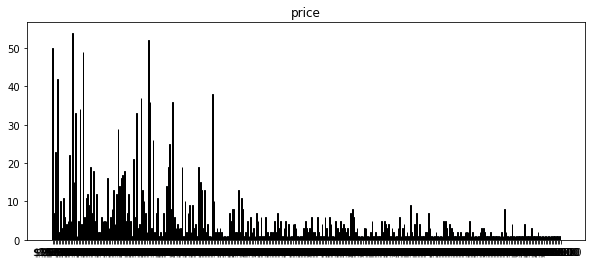

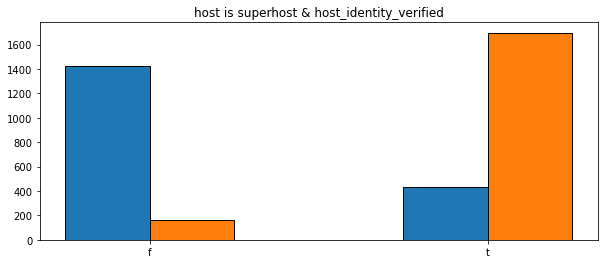

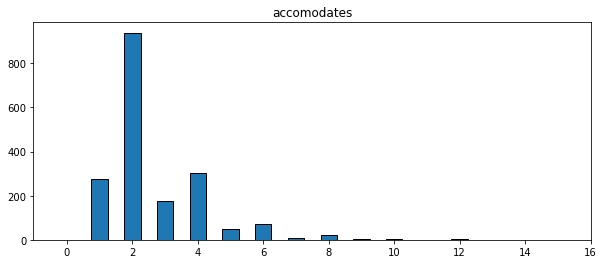

C:\Users\Paulina\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Paulina\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


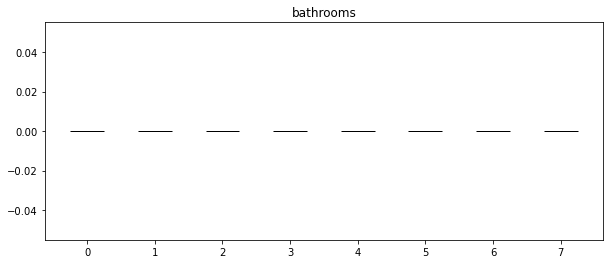

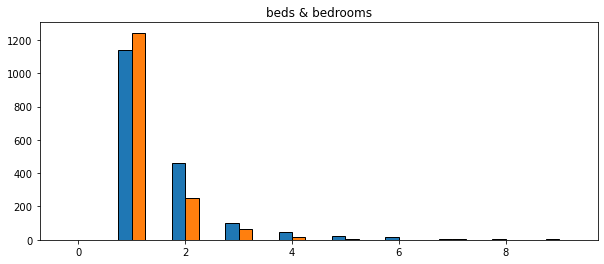

In [314]:
# wizualizacja rozkładu danych (histogramy) przed czyszczeniem

# price
plt.figure(figsize=(10,4))
plt.title('price')
plt.hist(data_zu.price,bins=np.arange(335)-0.5, edgecolor='black',histtype='bar',align='mid',rwidth=0.5)
plt.show()

# host is superhost & host_identity_verified
plt.figure(figsize=(10,4))
plt.title('host is superhost & host_identity_verified')
plt.hist([data_zu.host_is_superhost,data_zu.host_identity_verified], bins=np.arange(3)-0.5, edgecolor='black',histtype='bar',rwidth=0.5)
plt.show()

# accomodates
plt.figure(figsize=(10,4))
plt.title('accomodates')
plt.hist(data_zu.accommodates, bins=np.arange(17)-0.5, edgecolor='black',histtype='bar',align='mid',rwidth=0.5)
plt.show()

# bathrooms
plt.figure(figsize=(10,4))
plt.title('bathrooms')
plt.hist(data_zu.bathrooms, bins=np.arange(9)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# beds & bedrooms
plt.figure(figsize=(10,4))
plt.title('beds & bedrooms')
plt.hist([data_zu.beds,data_zu.bedrooms], bins=np.arange(11)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

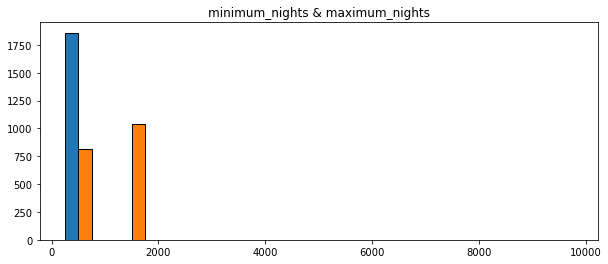

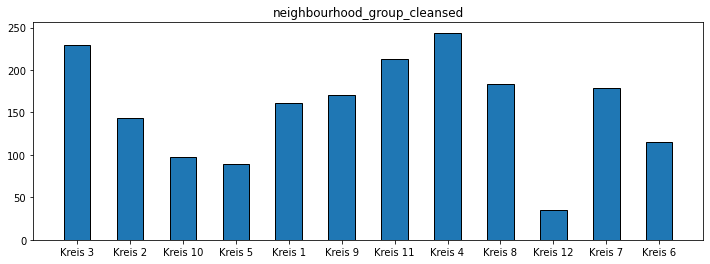

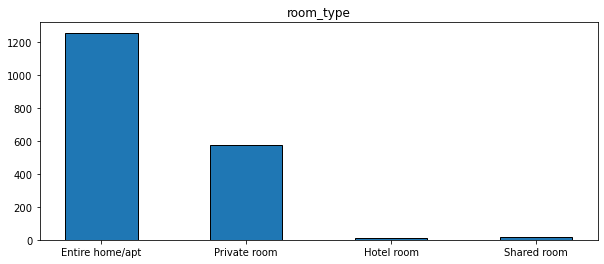

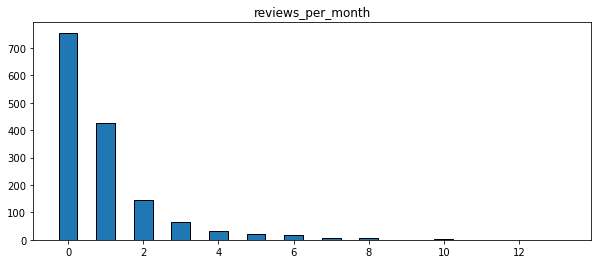

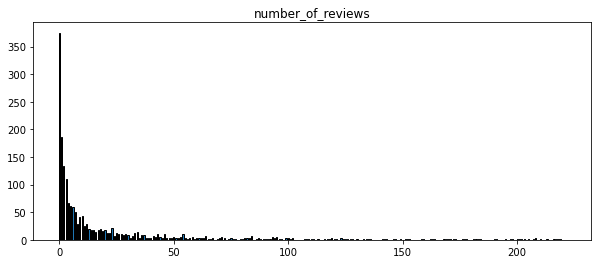

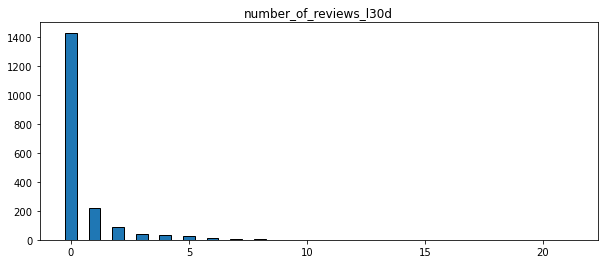

In [315]:
# minimum_nights & maximum_nights
plt.figure(figsize=(10,4))
plt.title('minimum_nights & maximum_nights')
plt.hist([data_zu.minimum_nights,data_zu.maximum_nights], edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# neighbourhood_group_cleansed
plt.figure(figsize=(12,4))
plt.title('neighbourhood_group_cleansed')
plt.hist(data_zu.neighbourhood_group_cleansed,bins=np.arange(13)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# room_type
plt.figure(figsize=(10,4))
plt.title('room_type')
plt.hist(data_zu.room_type,bins=np.arange(5)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# reviews_per_month
plt.figure(figsize=(10,4))
plt.title('reviews_per_month')
plt.hist(data_zu.reviews_per_month, bins=np.arange(15)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# number_of_reviews
plt.figure(figsize=(10,4))
plt.title('number_of_reviews')
plt.hist(data_zu.number_of_reviews, bins=np.arange(223)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# number_of_reviews_l30d
plt.figure(figsize=(10,4))
plt.title('number_of_reviews_l30d')
plt.hist(data_zu.number_of_reviews_l30d, bins=np.arange(23)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

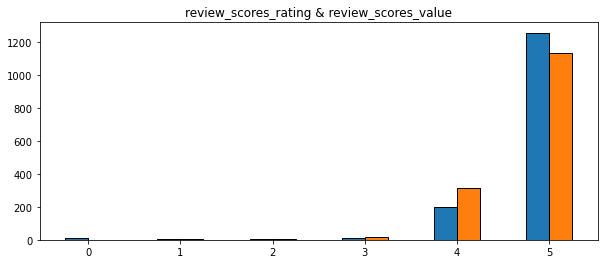

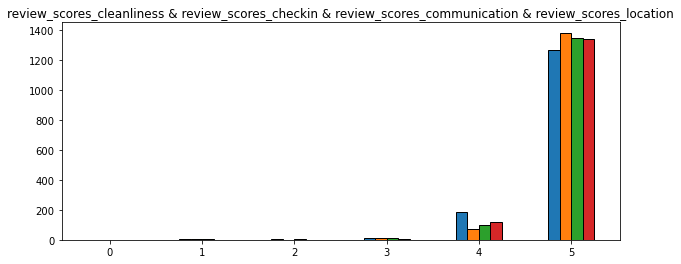

In [316]:
# review_scores_rating & review_scores_value
plt.figure(figsize=(10,4))
plt.title('review_scores_rating & review_scores_value')
plt.hist([data_zu.review_scores_rating,data_zu.review_scores_value], bins=np.arange(7)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

# review_scores_cleanliness & review_scores_checkin & review_scores_communication & review_scores_location
plt.figure(figsize=(10,4))
plt.title('review_scores_cleanliness & review_scores_checkin & review_scores_communication & review_scores_location')
plt.hist([data_zu.review_scores_cleanliness,data_zu.review_scores_checkin,data_zu.review_scores_communication,data_zu.review_scores_location], bins=np.arange(7)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

In [317]:
# skośność dla wybranych zmiennych numerycznych
# Skośność jest miarą asymetrii obserwowanych wyników. Informuje nas o tym jak wyniki dla danej zmiennej kształtują się wokół średniej. Czy większość zaobserwowanych wyników jest z lewej strony średniej, blisko wartości średniej czy z prawej strony średniej? Innymi słowy, czy w naszym zbiorze obserwacji więcej jest wyników, które są niższe niż średnia dla całej grupy, wyższe czy równe średniej?
# Współczynnik skośności powyżej 0 świadczy o prawostronnejasymetrii rozkładu (inaczej nazywanym rozkładem dodatnio skośnym), a wyniki poniżej 0 świadczą o lewostronnej asymetrii rozkładu (inaczej nazwanym ujemno skośnym rozkładem).

print('Skewness accommodates - {}'.format(ss.skew(data_zu.accommodates)))
print('Skewness bathrooms - {}'.format(ss.skew(data_zu.bathrooms)))
print('Skewness bedrooms - {}'.format(ss.skew(data_zu.bedrooms)))
print('Skewness beds - {}'.format(ss.skew(data_zu.beds)))
print('Skewness minimum_nights - {}'.format(ss.skew(data_zu.minimum_nights)))
print('Skewness maximum_nights - {}'.format(ss.skew(data_zu.maximum_nights)))
print('Skewness number_of_reviews - {}'.format(ss.skew(data_zu.number_of_reviews)))
print('Skewness number_of_reviews_l30d - {}'.format(ss.skew(data_zu.number_of_reviews_l30d)))
print('Skewness review_scores_rating - {}'.format(ss.skew(data_zu.review_scores_rating)))
print('Skewness review_scores_accuracy - {}'.format(ss.skew(data_zu.review_scores_accuracy)))
print('Skewness review_scores_cleanliness - {}'.format(ss.skew(data_zu.review_scores_cleanliness)))
print('Skewness review_scores_checkin - {}'.format(ss.skew(data_zu.review_scores_checkin)))
print('Skewness review_scores_communication - {}'.format(ss.skew(data_zu.review_scores_communication)))
print('Skewness review_scores_location - {}'.format(ss.skew(data_zu.review_scores_location)))
print('Skewness review_scores_value - {}'.format(ss.skew(data_zu.review_scores_value)))
print('Skewness reviews_per_month - {}'.format(ss.skew(data_zu.reviews_per_month)))

Skewness accommodates - 2.3294451949974437
Skewness bathrooms - nan
Skewness bedrooms - nan
Skewness beds - nan
Skewness minimum_nights - 9.90671057561072
Skewness maximum_nights - 2.344134830131075
Skewness number_of_reviews - 4.94227066378762
Skewness number_of_reviews_l30d - 4.646905884358442
Skewness review_scores_rating - nan
Skewness review_scores_accuracy - nan
Skewness review_scores_cleanliness - nan
Skewness review_scores_checkin - nan
Skewness review_scores_communication - nan
Skewness review_scores_location - nan
Skewness review_scores_value - nan
Skewness reviews_per_month - nan


In [318]:
# kurtoza dla wybranych zmiennych numerycznych
# Kurtoza jest miarą koncentracji wyników. Kurtoza informuje nas o tym, na ile nasze obserwacje, wyniki są skoncentrowane wokół średniej. Miara ta informuje nas jak dużo naszych wyników / obserwacji jest zbliżona do wartości średniej, czy większość z zaobserwowanych wyników ma wartość podobną do średniej?
# Jeżeli kurtoza jest niska (poniżej zera) to w zbiorze danych możemy zaobserwować większą liczbę wyników skrajnych (znacznie oddalonych od średniej), gdy kurtoza jest wyższa tym liczba takich obserwacji maleje. 

print('Kurtosis accommodates - {}'.format(ss.kurtosis(data_zu.accommodates)))
print('Kurtosis bathrooms - {}'.format(ss.kurtosis(data_zu.bathrooms)))
print('Kurtosis bedrooms - {}'.format(ss.kurtosis(data_zu.bedrooms)))
print('Kurtosis beds - {}'.format(ss.kurtosis(data_zu.beds)))
print('Kurtosis minimum_nights - {}'.format(ss.kurtosis(data_zu.minimum_nights)))
print('Kurtosis maximum_nights - {}'.format(ss.kurtosis(data_zu.maximum_nights)))
print('Kurtosis number_of_reviews - {}'.format(ss.kurtosis(data_zu.number_of_reviews)))
print('Kurtosis number_of_reviews_l30d - {}'.format(ss.kurtosis(data_zu.number_of_reviews_l30d)))
print('Kurtosis review_scores_rating - {}'.format(ss.kurtosis(data_zu.review_scores_rating)))
print('Kurtosis review_scores_accuracy - {}'.format(ss.kurtosis(data_zu.review_scores_accuracy)))
print('Kurtosis review_scores_cleanliness - {}'.format(ss.kurtosis(data_zu.review_scores_cleanliness)))
print('Kurtosis review_scores_checkin - {}'.format(ss.kurtosis(data_zu.review_scores_checkin)))
print('Kurtosis review_scores_communication - {}'.format(ss.kurtosis(data_zu.review_scores_communication)))
print('Kurtosis review_scores_location - {}'.format(ss.kurtosis(data_zu.review_scores_location)))
print('Kurtosis review_scores_value - {}'.format(ss.kurtosis(data_zu.review_scores_value)))
print('Kurtosis reviews_per_month - {}'.format(ss.kurtosis(data_zu.reviews_per_month)))

Kurtosis accommodates - 9.656950276196989
Kurtosis bathrooms - nan
Kurtosis bedrooms - nan
Kurtosis beds - nan
Kurtosis minimum_nights - 122.58731385364774
Kurtosis maximum_nights - 42.736699059431615
Kurtosis number_of_reviews - 38.046780192690306
Kurtosis number_of_reviews_l30d - 37.77124868768807
Kurtosis review_scores_rating - nan
Kurtosis review_scores_accuracy - nan
Kurtosis review_scores_cleanliness - nan
Kurtosis review_scores_checkin - nan
Kurtosis review_scores_communication - nan
Kurtosis review_scores_location - nan
Kurtosis review_scores_value - nan
Kurtosis reviews_per_month - nan


#### Weryfikacja poszczególnych typów danych w dataframe, ich korekta oraz uzupełnienie brakujących wartości

In [319]:
# weryfikacja poszczególnych typów w dataframe i ich korekta

# kolumna host_response_time
data_zu.host_response_time = data_zu.host_response_time.fillna('no info')

# kolumna accommodates
data_zu.accommodates = data_zu.accommodates.fillna(data_zu.accommodates.median()).astype(int)

# kolumna bathrooms
data_zu.bathrooms = data_zu.bathrooms_text.str.slice(0,1)
data_zu.bathrooms = data_zu.bathrooms.str.extract('(\d+)', expand=False)
data_zu.bathrooms = data_zu.bathrooms.fillna(data_zu.bathrooms.median()).astype(int)

# kolumna bedrooms
data_zu.bedrooms = data_zu.bedrooms.fillna(data_zu.bedrooms.median()).astype(int)

# kolumna beds
data_zu.beds = data_zu.beds.fillna(data_zu.beds.median()).astype(int)

# kolumna price
data_zu.price = data_zu.price.apply(lambda x: x.replace("$",""))
data_zu.price = data_zu.price.apply(lambda x: x.replace(",",""))
data_zu.price = data_zu.price.astype(float)

# kolumna minimum_nights
data_zu.minimum_nights = data_zu.minimum_nights.fillna(data_zu.minimum_nights.median()).astype(int)

# kolumna maximum_nights
data_zu.maximum_nights = data_zu.maximum_nights.fillna( data_zu.maximum_nights.median()).astype(int)

# kolumna number_of_reviews
data_zu.reviews_per_month = data_zu.reviews_per_month.fillna(data_zu.reviews_per_month.mean()).astype(float)

# kolumna review_scores_rating
data_zu.review_scores_rating = data_zu.review_scores_rating.fillna(data_zu.review_scores_rating.mean()).astype(float)

# kolumna review_scores_accuracy
data_zu.review_scores_accuracy = data_zu.review_scores_accuracy.fillna(data_zu.review_scores_accuracy.mean()).astype(float)

# kolumna review_scores_cleanliness
data_zu.review_scores_cleanliness = data_zu.review_scores_cleanliness.fillna(data_zu.review_scores_cleanliness.mean()).astype(float)

# kolumna review_scores_checkin
data_zu.review_scores_checkin = data_zu.review_scores_checkin.fillna(data_zu.review_scores_checkin.mean()).astype(float)

# kolumna review_scores_communication
data_zu.review_scores_communication = data_zu.review_scores_communication.fillna(data_zu.review_scores_communication.mean()).astype(float)

# kolumna review_scores_location
data_zu.review_scores_location = data_zu.review_scores_location.fillna( data_zu.review_scores_location.mean()).astype(float)

# kolumna review_scores_value
data_zu.review_scores_value = data_zu.review_scores_value.fillna(data_zu.review_scores_value.mean()).astype(float)

# kolumna number_of_reviews_l30d 
data_zu.number_of_reviews_l30d = data_zu.number_of_reviews_l30d.fillna(data_zu.number_of_reviews_l30d.median()).astype(int)

In [320]:
#usunięcie wybranych kolumn, których nie będę analizować
data_zu.drop(data_zu.columns[[0,1,2,3,4,5,6,7,8,9,10,12,13,15,16,18,19,20,21,22,23,24,26,29,30,31,35,38,42,43,44,45,48,54,58,59,67,69,70,71,72]],axis=1,inplace=True)

In [321]:
# usunięcie wartości brzegowych
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(data_zu.price, 99.5)))
data_zu = data_zu[(data_zu.price <= np.percentile(data_zu.price, 99.5)) & (data_zu.price > 0)]

print("99.5% properties have a minimum_nights lower than {0: .2f}".format(np.percentile(data_zu.minimum_nights, 99.5)))
data_zu = data_zu[(data_zu.minimum_nights <= np.percentile(data_zu.minimum_nights, 99.5)) & (data_zu.minimum_nights > 0)]

print("99.5% properties have a maximum_nights lower than {0: .2f}".format(np.percentile(data_zu.maximum_nights, 99.5)))
data_zu = data_zu[(data_zu.maximum_nights <= np.percentile(data_zu.maximum_nights, 99.5)) & (data_zu.maximum_nights > 0)]

99.5% properties have a price lower than  1057.21
99.5% properties have a minimum_nights lower than  180.00
99.5% properties have a maximum_nights lower than  1125.00


In [322]:
# wyświetlenie informacji o dataframe po czyszczeniu
data_zu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 2 to 1859
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_since                    1840 non-null   object 
 1   host_response_time            1840 non-null   object 
 2   host_is_superhost             1840 non-null   object 
 3   host_identity_verified        1840 non-null   object 
 4   neighbourhood_cleansed        1840 non-null   object 
 5   neighbourhood_group_cleansed  1840 non-null   object 
 6   room_type                     1840 non-null   object 
 7   accommodates                  1840 non-null   int32  
 8   bathrooms                     1840 non-null   int32  
 9   bedrooms                      1840 non-null   int32  
 10  beds                          1840 non-null   int32  
 11  price                         1840 non-null   float64
 12  minimum_nights                1840 non-null   int32  
 13  max

In [323]:
# wyświetlenie próbki dnaych po czyszczeniu
data_zu.head(5)

,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
2,2011-06-13,within a day,f,t,Alt-Wiedikon,Kreis 3,Entire home/apt,2,1,1,2,200.00,3,365,3.00,365.00,t,27,57,87,362,0,0,0,4.69,4.76,4.74,4.84,4.82,4.80,4.62,f,1.01
3,2011-07-22,no info,f,f,Enge,Kreis 2,Private room,1,1,1,1,60.00,5,31,5.00,31.00,t,0,0,0,58,9,0,0,4.89,4.89,4.89,4.89,4.89,5.00,4.89,f,0.07
4,2011-08-22,no info,f,f,Höngg,Kreis 10,Private room,1,1,1,1,200.00,3,6,3.00,6.00,t,29,59,89,364,0,0,0,4.69,4.76,4.74,4.84,4.82,4.80,4.62,f,1.01
5,2011-09-06,a few days or more,f,f,Sihlfeld,Kreis 3,Entire home/apt,2,1,1,1,198.00,1,365,1.00,365.00,t,29,59,89,364,0,0,0,4.69,4.76,4.74,4.84,4.82,4.80,4.62,f,1.01
6,2011-09-14,within a few hours,f,t,Wollishofen,Kreis 2,Private room,2,1,1,1,69.00,2,90,2.00,"1,125.00",t,0,0,0,268,222,1,0,4.58,4.65,4.32,4.82,4.83,4.76,4.60,t,1.80


In [324]:
# analiza zmiennych numerycznych po czyszczeniu
data_zu.describe()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,"1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00","1,840.00"
mean,2.65,1.10,1.25,1.56,166.44,6.86,690.71,9.78,"3,456.92",11.86,26.38,42.19,149.62,27.14,5.59,0.51,4.69,4.76,4.74,4.84,4.82,4.80,4.62,1.01
std,1.56,0.38,0.62,1.02,147.11,15.06,503.09,45.64,"113,786.05",11.85,23.76,35.87,139.20,59.13,11.74,1.30,0.53,0.42,0.35,0.34,0.35,0.27,0.39,1.29
min,1.00,0.00,1.00,1.00,25.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.01
25%,2.00,1.00,1.00,1.00,76.00,2.00,83.75,2.00,365.00,0.00,0.00,0.00,12.75,1.00,0.00,0.00,4.69,4.76,4.71,4.84,4.82,4.78,4.56,0.24
50%,2.00,1.00,1.00,1.00,113.00,3.00,"1,125.00",3.00,"1,125.00",9.00,25.00,39.00,89.00,5.00,1.00,0.00,4.75,4.83,4.76,4.89,4.88,4.81,4.62,0.74
75%,3.00,1.00,1.00,2.00,189.25,5.00,"1,125.00",6.00,"1,125.00",24.00,52.25,82.00,303.25,23.00,5.00,0.00,4.99,5.00,4.99,5.00,5.00,5.00,4.85,1.01
max,16.00,7.00,7.00,10.00,"1,041.00",180.00,"1,125.00",710.20,"4,881,641.70",30.00,60.00,90.00,365.00,811.00,172.00,20.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,15.14


In [325]:
# analiza zmiennych kategorycznych przed czyszczeniem
data_zu.select_dtypes(include=['object']).describe()

,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,has_availability,instant_bookable
count,1840,1840,1840,1840,1840,1840,1840,1840,1840
unique,886,5,2,2,34,12,4,2,2
top,2014-03-07,within an hour,f,t,Altstetten,Kreis 4,Entire home/apt,t,f
freq,91,881,1412,1679,130,241,1243,1827,1108


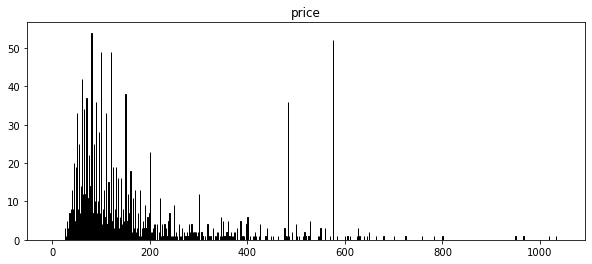

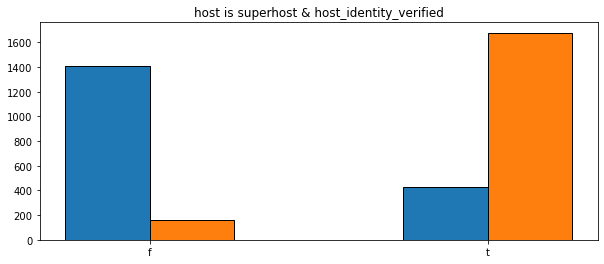

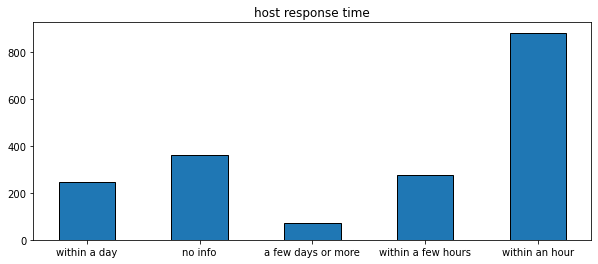

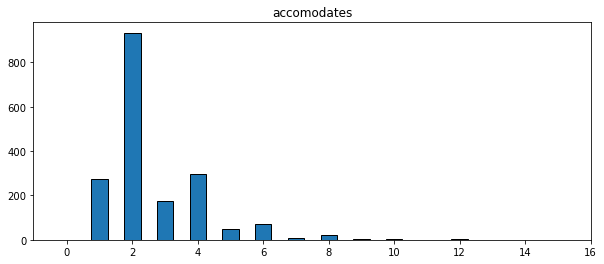

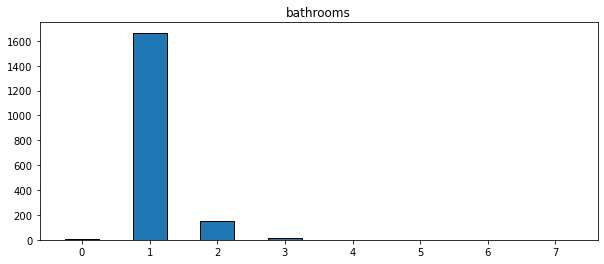

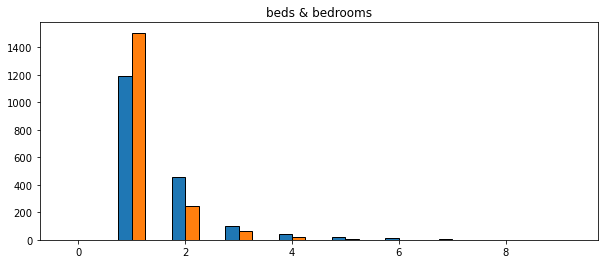

In [326]:
# wizualizacja rozkładu danych po czyszczeniu
plt.figure(figsize=(10,4))
plt.title('price')
plt.hist(data_zu.price,bins=np.arange(1042)-0.5, edgecolor='black',histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('host is superhost & host_identity_verified')
plt.hist([data_zu.host_is_superhost,data_zu.host_identity_verified], bins=np.arange(3)-0.5, edgecolor='black',histtype='bar',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('host response time')
plt.hist(data_zu.host_response_time, bins=np.arange(6)-0.5, edgecolor='black',histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('accomodates')
plt.hist(data_zu.accommodates, bins=np.arange(17)-0.5, edgecolor='black',histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('bathrooms')
plt.hist(data_zu.bathrooms, bins=np.arange(9)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()
          
plt.figure(figsize=(10,4))
plt.title('beds & bedrooms')
plt.hist([data_zu.beds,data_zu.bedrooms], bins=np.arange(11)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

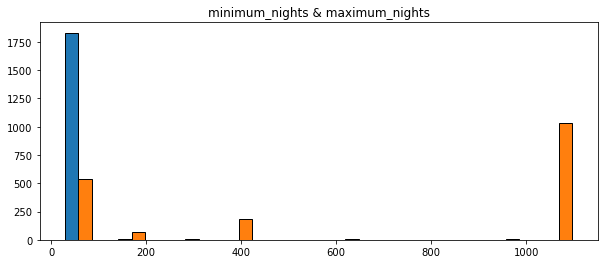

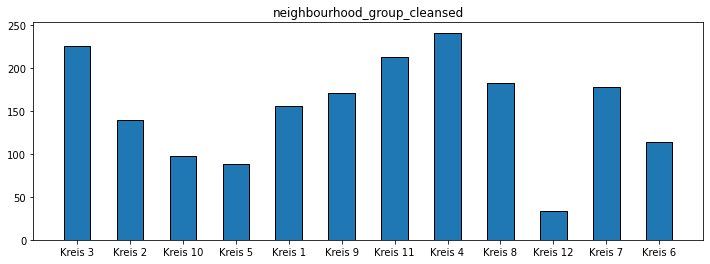

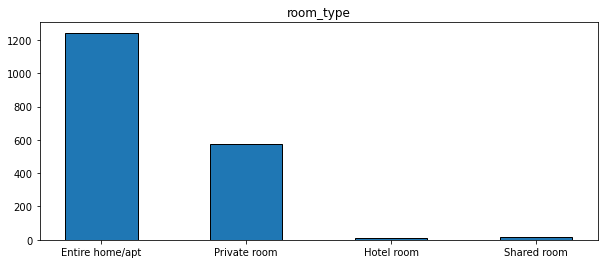

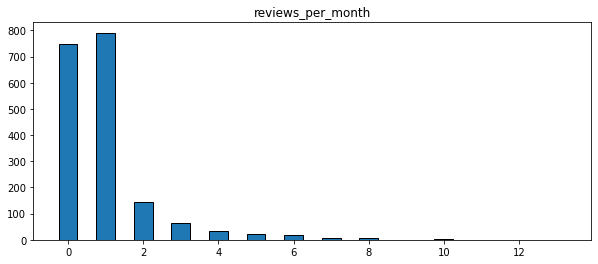

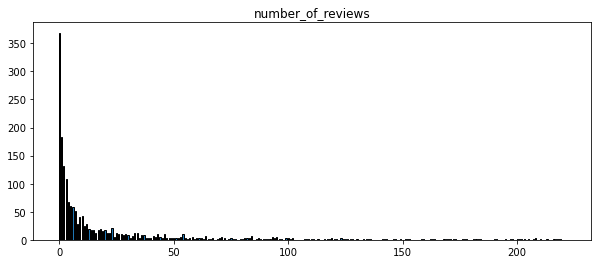

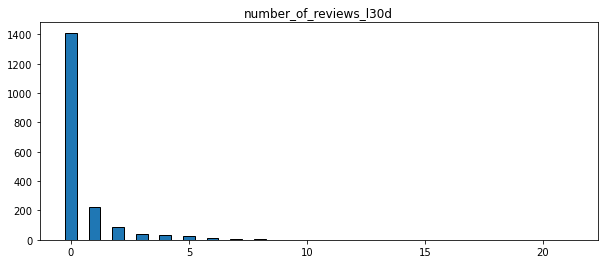

In [327]:
plt.figure(figsize=(10,4))
plt.title('minimum_nights & maximum_nights')
plt.hist([data_zu.minimum_nights,data_zu.maximum_nights], edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(12,4))
plt.title('neighbourhood_group_cleansed')
plt.hist(data_zu.neighbourhood_group_cleansed,bins=np.arange(13)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('room_type')
plt.hist(data_zu.room_type,bins=np.arange(5)-0.5, edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('reviews_per_month')
plt.hist(data_zu.reviews_per_month, bins=np.arange(15)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('number_of_reviews')
plt.hist(data_zu.number_of_reviews, bins=np.arange(223)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('number_of_reviews_l30d')
plt.hist(data_zu.number_of_reviews_l30d, bins=np.arange(23)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

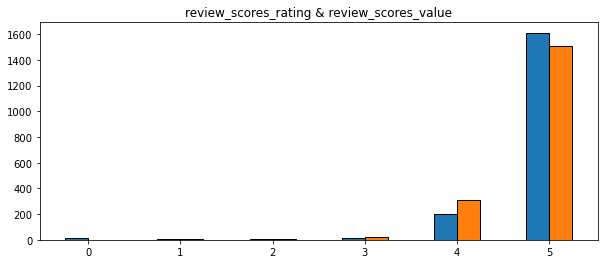

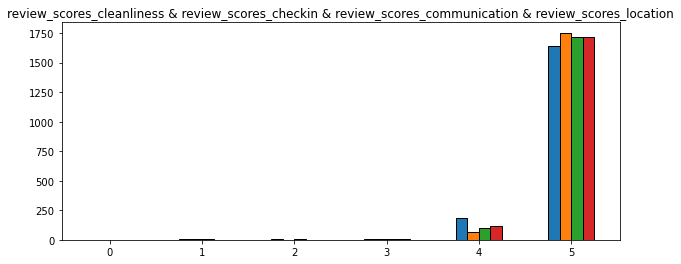

In [328]:
plt.figure(figsize=(10,4))
plt.title('review_scores_rating & review_scores_value')
plt.hist([data_zu.review_scores_rating,data_zu.review_scores_value], bins=np.arange(7)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

plt.figure(figsize=(10,4))
plt.title('review_scores_cleanliness & review_scores_checkin & review_scores_communication & review_scores_location')
plt.hist([data_zu.review_scores_cleanliness,data_zu.review_scores_checkin,data_zu.review_scores_communication,data_zu.review_scores_location], bins=np.arange(7)-0.5,edgecolor='black', histtype='bar',align='mid',rwidth=0.5)
plt.show()

In [329]:
# wybór zmiennych do modelu i przypisanie ich do nowego dataframe
data_model = data_zu[['host_response_time','host_is_superhost','host_identity_verified','accommodates','bathrooms',
                      'neighbourhood_group_cleansed','room_type','bedrooms','beds','price','minimum_nights',
                     'maximum_nights','number_of_reviews','number_of_reviews_l30d','review_scores_rating', 'review_scores_accuracy',
                     'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                     'review_scores_value','instant_bookable','reviews_per_month']]

In [330]:
# wyświetlenie macierzy korealcji danych numerycznych wg metody Spearmana
data_model.corr(method='spearman')

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
accommodates,1.00,0.26,0.60,0.70,0.53,-0.01,0.14,0.07,0.09,-0.02,0.01,0.03,0.01,-0.02,-0.02,-0.07,0.03
bathrooms,0.26,1.00,0.39,0.26,0.18,0.06,-0.02,-0.05,-0.03,0.04,0.02,0.01,0.04,0.05,0.05,0.02,-0.04
bedrooms,0.60,0.39,1.00,0.63,0.35,0.07,0.02,0.01,0.02,0.03,0.02,0.05,0.04,0.01,0.03,-0.00,0.01
beds,0.70,0.26,0.63,1.00,0.39,0.04,0.12,0.05,0.05,-0.03,-0.01,0.00,0.01,-0.01,-0.02,-0.03,0.01
price,0.53,0.18,0.35,0.39,1.00,-0.07,0.25,-0.10,-0.05,-0.04,-0.07,0.06,-0.01,-0.05,0.03,-0.16,-0.10
minimum_nights,-0.01,0.06,0.07,0.04,-0.07,1.00,0.01,-0.24,-0.26,0.03,0.06,-0.03,0.06,0.05,0.09,0.03,-0.26
maximum_nights,0.14,-0.02,0.02,0.12,0.25,0.01,1.00,0.04,0.01,-0.08,-0.10,-0.05,-0.04,-0.07,0.00,-0.14,-0.08
number_of_reviews,0.07,-0.05,0.01,0.05,-0.10,-0.24,0.04,1.00,0.44,0.05,0.09,0.04,0.02,0.02,-0.01,0.04,0.26
number_of_reviews_l30d,0.09,-0.03,0.02,0.05,-0.05,-0.26,0.01,0.44,1.00,0.02,0.05,0.04,-0.02,-0.01,-0.03,0.01,0.47
review_scores_rating,-0.02,0.04,0.03,-0.03,-0.04,0.03,-0.08,0.05,0.02,1.00,0.71,0.64,0.62,0.66,0.47,0.67,-0.15


In [331]:
# wyświetlenie macierzy korealcji danych numerycznych wg metody Pearsona
data_model.corr(method='pearson')

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
accommodates,1.00,0.42,0.69,0.72,0.39,-0.03,0.08,0.11,0.15,-0.00,0.02,0.02,0.02,0.01,-0.00,-0.03,0.10
bathrooms,0.42,1.00,0.47,0.35,0.21,0.04,-0.05,-0.00,0.09,0.01,0.03,0.00,0.03,0.04,0.05,0.02,0.02
bedrooms,0.69,0.47,1.00,0.72,0.29,0.03,-0.01,0.02,0.01,0.01,0.02,0.02,0.03,0.02,0.03,0.01,-0.01
beds,0.72,0.35,0.72,1.00,0.29,0.03,0.07,0.09,0.05,-0.01,0.01,-0.00,0.01,0.00,-0.02,-0.02,0.03
price,0.39,0.21,0.29,0.29,1.00,-0.03,0.25,-0.10,-0.10,-0.03,-0.08,0.01,-0.01,-0.06,-0.02,-0.14,-0.14
minimum_nights,-0.03,0.04,0.03,0.03,-0.03,1.00,-0.00,-0.11,-0.12,-0.03,0.01,-0.01,-0.02,0.00,-0.01,0.01,-0.12
maximum_nights,0.08,-0.05,-0.01,0.07,0.25,-0.00,1.00,0.00,-0.02,-0.03,-0.09,-0.05,-0.03,-0.04,0.00,-0.12,-0.09
number_of_reviews,0.11,-0.00,0.02,0.09,-0.10,-0.11,0.00,1.00,0.46,0.04,0.06,0.04,0.03,0.03,0.01,0.04,0.65
number_of_reviews_l30d,0.15,0.09,0.01,0.05,-0.10,-0.12,-0.02,0.46,1.00,0.04,0.05,0.04,0.01,0.02,-0.01,0.02,0.69
review_scores_rating,-0.00,0.01,0.01,-0.01,-0.03,-0.03,-0.03,0.04,0.04,1.00,0.56,0.50,0.51,0.51,0.33,0.56,0.06


<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

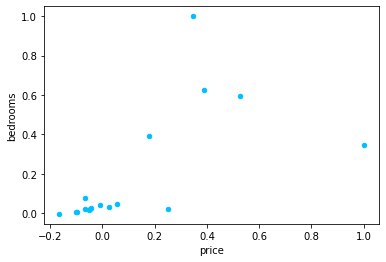

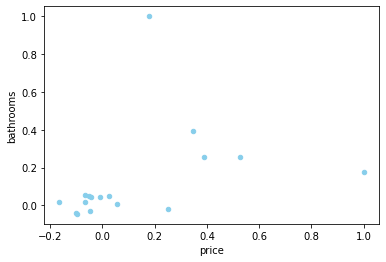

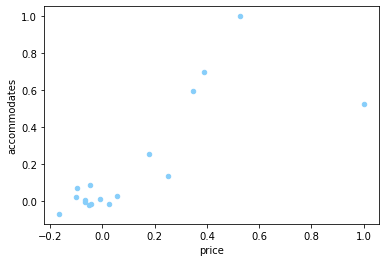

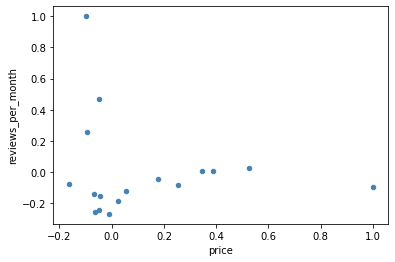

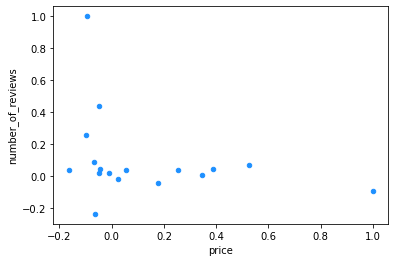

In [332]:
# wizualizacja macierzy korelacji Spearmana na wykresie typu scatter dla wybranych danych 

data_model.corr(method='spearman').plot(kind='scatter', x='price', y='bedrooms', color='deepskyblue')
data_model.corr(method='spearman').plot(kind='scatter', x='price', y='bathrooms', color='skyblue')
data_model.corr(method='spearman').plot(kind='scatter', x='price', y='accommodates', color='lightskyblue')
data_model.corr(method='spearman').plot(kind='scatter', x='price', y='reviews_per_month', color='steelblue')
data_model.corr(method='spearman').plot(kind='scatter', x='price', y='number_of_reviews', color='dodgerblue')

Współczynnik korelacji Spearmana służy do badania zależności między danymi. Współczynnik korelacji Spearmana mierzy dowolną monotoniczną zależność. Współczynnik korelacji Spearmana jest ogólniejszy od współczynnika korelacji Pearsona, który mierzy tylko zależność liniową.

Np. Jeżeli w naszych danych X i Y zachodziłaby relacja Y=X^2 to współczynnik Pearsona byłby bliski 0, a współczynnik Spearmana bliski 1.

Na podstawie powyższych wykresów można dostrzec, że korelacja pomiędzy ceną za dobę a liczbą sypialni, łazienek oraz liczbą gości jest dużo słabsza niż w przypadku liczby recenzji w miesiącu lub ogólnej liczby wystawionych recenzji. To oznacza, że te dwie ostatnie cechy mocniej oddziałują na cenę za dobę.

<AxesSubplot:xlabel='review_scores_value', ylabel='review_scores_location'>

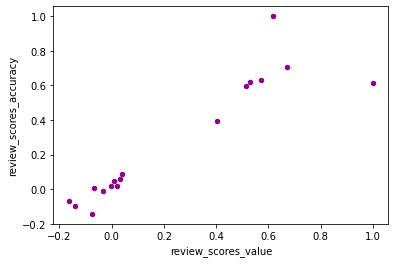

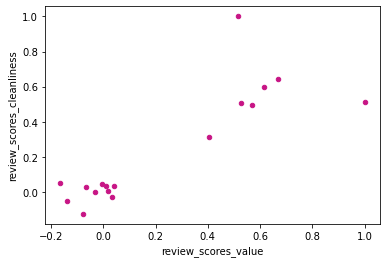

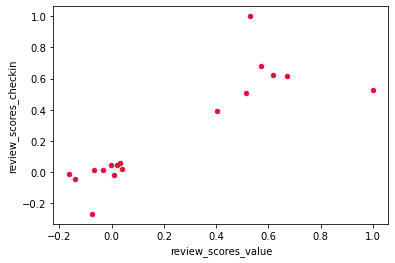

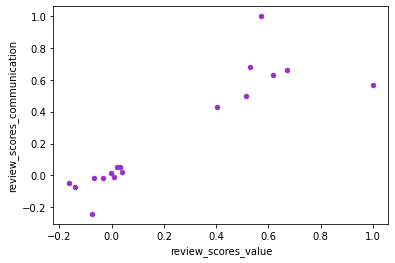

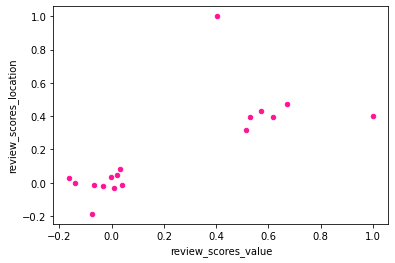

In [333]:
# wizualizacja macierzy korelacji Spearmana na wykresie typu scatter dla wybranych danych 

data_model.corr(method='spearman').plot(kind='scatter', x='review_scores_value', y='review_scores_accuracy', color='darkmagenta')
data_model.corr(method='spearman').plot(kind='scatter', x='review_scores_value', y='review_scores_cleanliness', color='mediumvioletred')
data_model.corr(method='spearman').plot(kind='scatter', x='review_scores_value', y='review_scores_checkin', color='crimson')
data_model.corr(method='spearman').plot(kind='scatter', x='review_scores_value', y='review_scores_communication', color='darkorchid')
data_model.corr(method='spearman').plot(kind='scatter', x='review_scores_value', y='review_scores_location', color='deeppink')

Na powyższych wykresach można wyróżnić obserwacje, które są słabo zależne (wartość recenzji od typów recenzji - czystość, lokalizacja itp.), ale im wyższa wartość tym wzrasta zależność.

<AxesSubplot:xlabel='accommodates', ylabel='beds'>

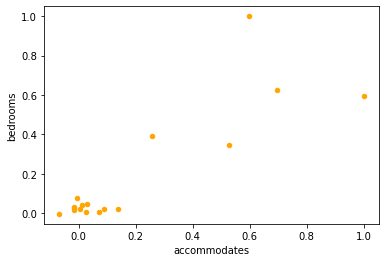

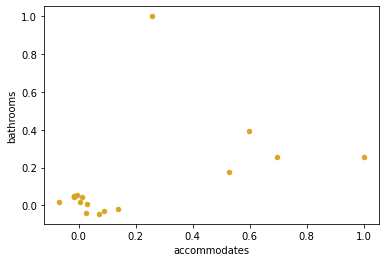

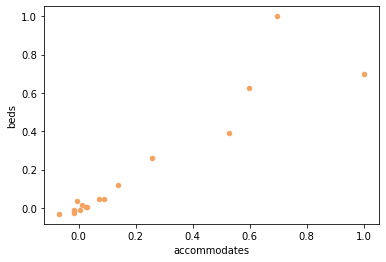

In [334]:
# wizualizacja macierzy korelacji Spearmana na wykresie typu scatter dla wybranych danych 

data_model.corr(method='spearman').plot(kind='scatter', x='accommodates', y='bedrooms', color='orange')
data_model.corr(method='spearman').plot(kind='scatter', x='accommodates', y='bathrooms', color='goldenrod')
data_model.corr(method='spearman').plot(kind='scatter', x='accommodates', y='beds', color='sandybrown')

Na powyższych wykresach można wyróżnić obserwacje, które są słabo zależne (wartość dot. max. liczby gości od liczby sypialni, łazienek oraz łóżek) - dla danych z mniejszymi wartościami - jest ich więcej w zbiorze danych, ale im wyższa wartość tym wzrasta zależność (szczególnie w przypadku liczby sypialni oraz łóżek).

Współczynnik zależności V Cramera między host_is_superhost i instant_bookable wynosi: 0.02924807145323686


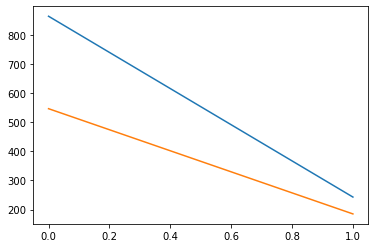

In [335]:
# dla zmiennych kategorycznych V Cramer
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


confusion_matrix1 = pd.crosstab(data_model['host_is_superhost'], data_model['instant_bookable']).to_numpy()
print('Współczynnik zależności V Cramera między host_is_superhost i instant_bookable wynosi: {}'.format(cramers_corrected_stat(confusion_matrix1)))
plt.plot(confusion_matrix1)
plt.show()

Współczynnik zależności V Cramera między host_is_superhost i host_identity_verified wynosi: 0.11584188548816834


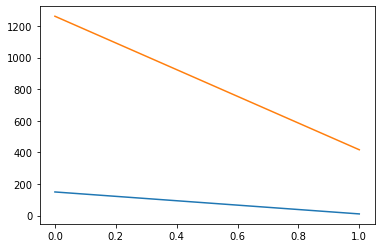

In [336]:
confusion_matrix2 = pd.crosstab(data_model['host_is_superhost'], data_model['host_identity_verified']).to_numpy()
print('Współczynnik zależności V Cramera między host_is_superhost i host_identity_verified wynosi: {}'.format(cramers_corrected_stat(confusion_matrix2)))
plt.plot(confusion_matrix2)
plt.show()

Współczynnik V Craméra daje w wyniku wartości pomiędzy 0 a +1 (włącznie), przy czym im wynik jest bliżej 0, tym słabszy jest związek między badanymi cechami, a im bliżej jest 1, tym silniejszy jest związek między badanymi cechami.

Na podstawie powyższych obliczeń oraz wykresów można dowiedzieć się, że:

- współczynnik V Craméra między host_is_superhost a instant_bookable wynosi ok. 0.03 co świadczy o tym, że związek pomiędzy tymi cechami praktycznie nie istnieje i nie ma żadnego znaczenia

- współczynnik V Craméra między host_is_superhost a host_identity_verified wynosi ok. 0.16 co mówi o tym, że związek pomiędzy tymi cechami nie jest silny, czyli jedna wpływa na drugą w małym stopniu

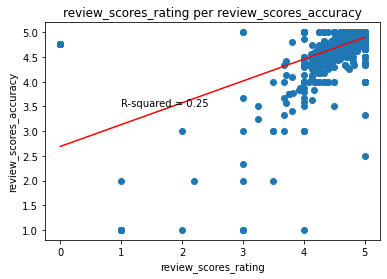

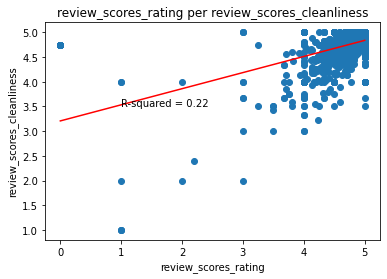

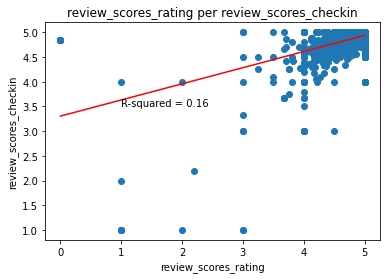

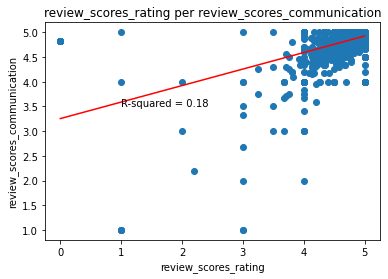

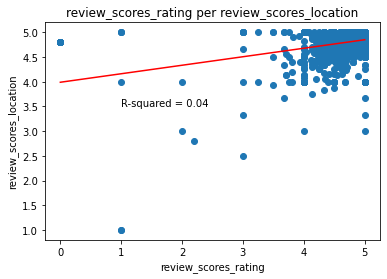

In [337]:
# współczynnik R modelu liniowego - dla wybranych zmiennych

# review_scores_rating per review_scores_accuracy
Y_test = data_model['review_scores_rating'].to_numpy()
Y_pred = data_model['review_scores_accuracy'].to_numpy()
r2 = r2_score(Y_test, Y_pred)
plt.scatter(Y_test,Y_pred)
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),color='red')
plt.title('review_scores_rating per review_scores_accuracy')
plt.xlabel('review_scores_rating')
plt.ylabel('review_scores_accuracy')
plt.text(1, 3.5, 'R-squared = %0.2f' % r2)
plt.show()

# review_scores_rating per review_scores_cleanliness
Y_test = data_model['review_scores_rating'].to_numpy()
Y_pred = data_model['review_scores_cleanliness'].to_numpy()
r2 = r2_score(Y_test, Y_pred)
plt.scatter(Y_test,Y_pred)
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),color='red')
plt.title('review_scores_rating per review_scores_cleanliness')
plt.xlabel('review_scores_rating')
plt.ylabel('review_scores_cleanliness')
plt.text(1, 3.5, 'R-squared = %0.2f' % r2)
plt.show()

# review_scores_rating per review_scores_checkin
Y_test = data_model['review_scores_rating'].to_numpy()
Y_pred = data_model['review_scores_checkin'].to_numpy()
r2 = r2_score(Y_test, Y_pred)
plt.scatter(Y_test,Y_pred)
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),color='red')
plt.title('review_scores_rating per review_scores_checkin')
plt.xlabel('review_scores_rating')
plt.ylabel('review_scores_checkin')
plt.text(1, 3.5, 'R-squared = %0.2f' % r2)
plt.show()

# review_scores_rating per review_scores_communication
Y_test = data_model['review_scores_rating'].to_numpy()
Y_pred = data_model['review_scores_communication'].to_numpy()
r2 = r2_score(Y_test, Y_pred)
plt.scatter(Y_test,Y_pred)
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),color='red')
plt.title('review_scores_rating per review_scores_communication')
plt.xlabel('review_scores_rating')
plt.ylabel('review_scores_communication')
plt.text(1, 3.5, 'R-squared = %0.2f' % r2)
plt.show()

# review_scores_rating per review_scores_location
Y_test = data_model['review_scores_rating'].to_numpy()
Y_pred = data_model['review_scores_location'].to_numpy()
r2 = r2_score(Y_test, Y_pred)
plt.scatter(Y_test,Y_pred)
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),color='red')
plt.title('review_scores_rating per review_scores_location')
plt.xlabel('review_scores_rating')
plt.ylabel('review_scores_location')
plt.text(1, 3.5, 'R-squared = %0.2f' % r2)
plt.show()

Współczynnik R-kwadrat jest miarą jakości dopasowania modelu. Mówi on o tym, jaki procent jednej zmiennej wyjaśnia zmienność drugiej zmiennej. Przyjmuje on wartości od 0 do 1.

Najczęściej spotykamy się z nim i wykorzystujemy go w trakcie przeprowadzania analizy regresji liniowej. Jest on jednak niekiedy interpretowany w przypadku wieloczynnikowej analizy wariancji.

R-squared wyjaśnia stopień, w jakim wariancja jednej zmiennej wyjaśnia wariancję drugiej zmiennej.

Na podstawie powyższych obliczeń oraz wykresów można dowiedzieć się, że:

- R2 modelu review_scores_rating per review_scores_accuracy wynosi 0.25 to oznacza, że ok. 1/4 obserwowanej zmienności review_scores_rating może być wyjaśnione przez review_scores_accuracy

- R2 modelu review_scores_rating per review_scores_cleanliness wynosi 0.22 to oznacza, że trochę ponad 1/5 obserwowanej zmienności review_scores_rating może być wyjaśnione przez review_scores_cleanliness

- R2 modelu review_scores_rating per review_scores_checkin wynosi 0.16 to oznacza, że ok. 16% obserwowanej zmienności review_scores_rating może być wyjaśnione przez review_scores_checkin

- R2 modelu review_scores_rating per review_scores_communication wynosi 0.18 to oznacza, że ok. 18% obserwowanej zmienności review_scores_rating może być wyjaśnione przez review_scores_communication

- R2 modelu review_scores_rating per review_scores_location wynosi 0.04 to oznacza, że zaledwie 4% obserwowanej zmienności review_scores_rating może być wyjaśnione przez review_scores_location

#### Pozostałe wykresy (zbadanie jak różne dane ze sobą korelują)

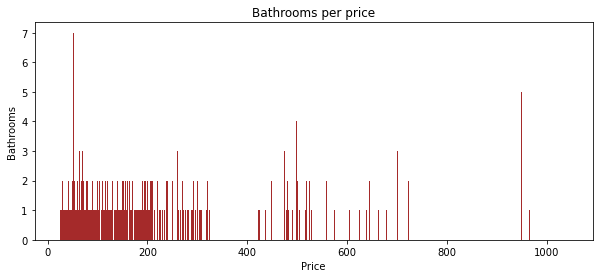

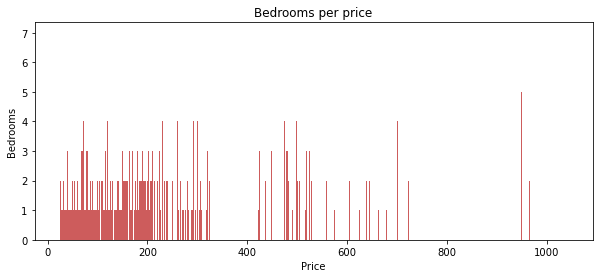

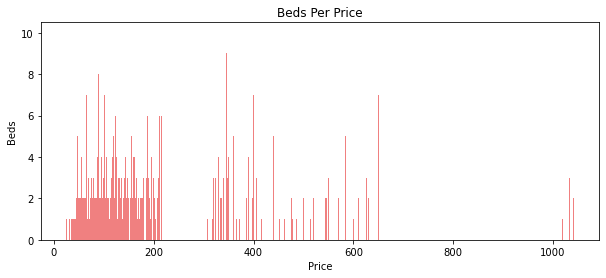

In [338]:
# wykresy dodatkowo
bathrooms = data_model.bathrooms
price = data_model.price

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(price,bathrooms, color ='brown')
 
plt.xlabel("Price")
plt.ylabel("Bathrooms")
plt.title("Bathrooms per price")
plt.show()

bedrooms = data_model.bedrooms

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(price,bedrooms, color ='indianred')
 
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.title("Bedrooms per price")
plt.show()

beds = data_model.beds

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(price,beds, color ='lightcoral')
 
plt.xlabel("Price")
plt.ylabel("Beds")
plt.title("Beds Per Price")
plt.show()

# Poniższe wykresy przedstawiają zależności pomiędzy liczbą łazienek, sypialni oraz łóżek w obiekcie w vs. cena za dobę w  $.
# Zecydowana większość lokali do 300$ za noc posiada 1 łazienkę.
# Podobnie jest z sypialniami, zdecydowanie przeważa 1 sypialnia w zakresie cen do 300$ za dobę, chociaż w przedziale cenowym
# od ok. 170$ do 210$ widać również wiele lokali z 2 sypialniami.
# Jeżeli chodzi o liczbę łóżek to w zakresie cenowym do ok. 200$ za dobę najwięcej jest obiektów z 1 lóżkiem aczkolwiek wiele ma
# też 2 łóżka.

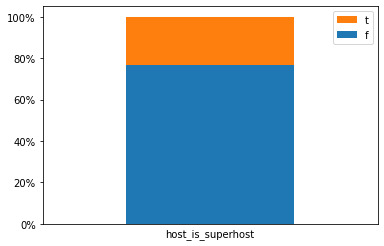

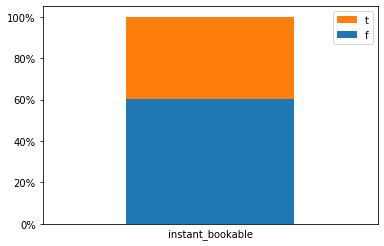

In [339]:
#wykresy
data_model.assign(dummy=1).groupby(['dummy','host_is_superhost']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.xlabel('host_is_superhost')
plt.xticks([])

current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(data_model['host_is_superhost'].unique())

plt.legend(reversed_handles, correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


data_model.assign(dummy=1).groupby(['dummy','instant_bookable']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.xlabel('instant_bookable')
plt.xticks([])

current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(data_model['instant_bookable'].unique())

plt.legend(reversed_handles, correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

# Pierwszy wykres prezentuje ilu hostów z badanego modelu danych jest oznaczonych jako superhost, a ilu nie.
# Kolor pomarańczowy (t) ozacza, że host jest superhostem, kolor niebieski (f) oznacza, że nie jest superhostem.
# Jak widać superhości stanowią ok. 20% wszystkich hostów zawartych w danych.
# Drugi wykres prezentuje ile lokali z badanego modelu danych można zarezerwować od razu, a ile nie ma tej opcji.
# Kolor pomarańczowy (t) ozacza, że oferowana jest opcja szybkiej rezerwacji, kolor niebieski (f) oznacza, że nie ma takiej opcji.
# Jak widać obiekty rezerwacją z natychmiastową stanowią prawie. 40% wszystkich lokali zawartych w danych.

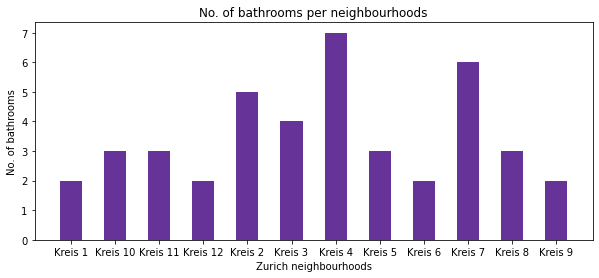

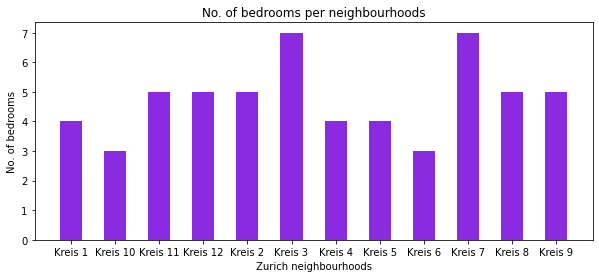

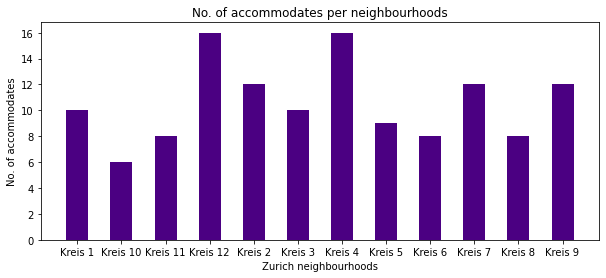

In [340]:
districts = data_model.neighbourhood_group_cleansed.sort_values()
bathrooms = data_model.bathrooms

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(districts,bathrooms, color ='rebeccapurple', width = 0.5)
 
plt.xlabel("Zurich neighbourhoods")
plt.ylabel("No. of bathrooms")
plt.title("No. of bathrooms per neighbourhoods")
plt.show()

bedrooms = data_model.bedrooms

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(districts,bedrooms, color ='blueviolet', width = 0.5)
 
plt.xlabel("Zurich neighbourhoods")
plt.ylabel("No. of bedrooms")
plt.title("No. of bedrooms per neighbourhoods")
plt.show()

accommodates = data_model.accommodates

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(districts,accommodates, color ='indigo', width = 0.5)
 
plt.xlabel("Zurich neighbourhoods")
plt.ylabel("No. of accommodates")
plt.title("No. of accommodates per neighbourhoods")
plt.show()

# Poniżej moża znaleźć odpowiedzi na pytania w jakich dystryktach znajdują sie lokale z największą liczbą łazienek, sypialni oraz
# możliwością zakwaterowania jak największej liczby gości.

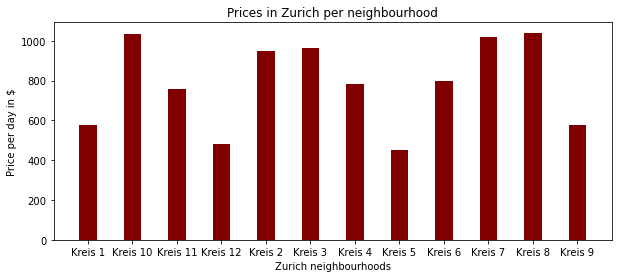

In [341]:
districts = data_model.neighbourhood_group_cleansed.sort_values()
price = data_model.price

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(districts,price, color ='maroon',
        width = 0.4)
 
plt.xlabel("Zurich neighbourhoods")
plt.ylabel("Price per day in $")
plt.title("Prices in Zurich per neighbourhood")
plt.show()

# Poniżej zostały zaprezentowane ceny za dobę w $ w poszczególnych dystryktach.
# W dystryktach Kreis 7, 8, 10 znajdują się lokale z najwyższą ceną za dobę.

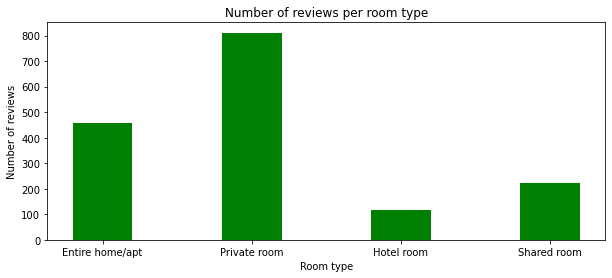

In [342]:
room_type = data_model.room_type
number_of_reviews = data_model.number_of_reviews

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(room_type,number_of_reviews, color ='green',
        width = 0.4)
 
plt.xlabel("Room type")
plt.ylabel("Number of reviews")
plt.title("Number of reviews per room type")
plt.show()

# Na poniższym wykresie wyraźnie widać, że obiekty typu "Private roo" to te, które są najczęściej oceniane, czyli są
# najczęściej wybierane przez gości w Zurichu.

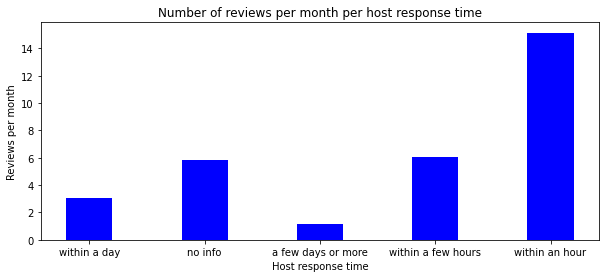

In [343]:
host_response_time = data_model.host_response_time
reviews_per_month = data_model.reviews_per_month

fig = plt.figure(figsize = (10, 4))
 
# creating the bar plot
plt.bar(host_response_time,reviews_per_month, color ='blue',
        width = 0.4)
 
plt.xlabel("Host response time")
plt.ylabel("Reviews per month")
plt.title("Number of reviews per month per host response time")
plt.show()

# Poniżej została zaprezentowana zależność miesięcznej liczby ocen gości od czasu odpowiedzi gospodarza na zapytanie.
# Najwięcej ocen mają Ci gospodarze, którzy odpowiadają bardzo szybko - w przeciągu godziny.
# Niestety jest też duża grupa gospodarzy ze sporą liczbą ocen w miesiącu, u których brakuje informacji na temat szybkości
# odpowiadania na wiadomości.

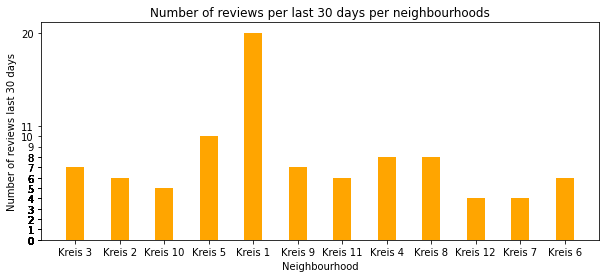

In [344]:
neighbourhood_group_cleansed = data_model.neighbourhood_group_cleansed
number_of_reviews_l30d = data_model.number_of_reviews_l30d

fig = plt.figure(figsize = (10, 4))
plt.yticks(number_of_reviews_l30d)
# creating the bar plot
plt.bar(neighbourhood_group_cleansed, number_of_reviews_l30d, color ='orange',
        width = 0.4)

plt.xlabel("Neighbourhood")
plt.ylabel("Number of reviews last 30 days")
plt.title("Number of reviews per last 30 days per neighbourhoods")
plt.show()


# Poniższy wkres prezentuje w jakim dystrykcie w Zurichu było najwięcej ocen od gości w ciągu ostatnich 30 dni.
# W dystrykcie Kreis 1 było najwięcej co sugeruje, że jest to bardzo popularna okolica.

<AxesSubplot:xlabel='review_scores_location', ylabel='price'>

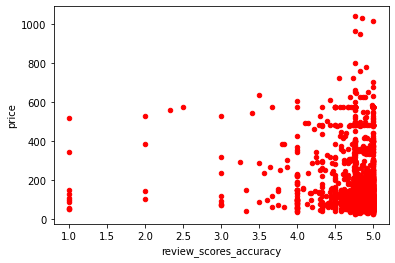

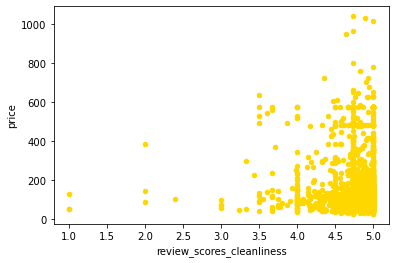

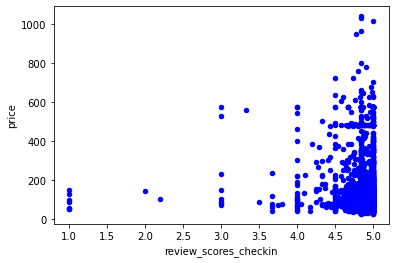

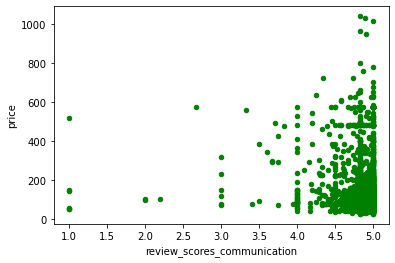

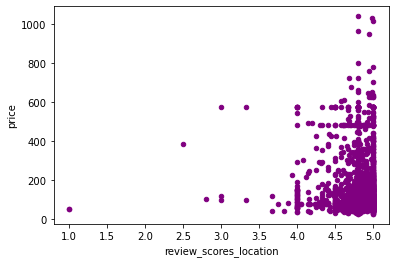

In [345]:
#wykresy
data_model.plot(kind='scatter', x='review_scores_accuracy', y='price', color='red')
data_model.plot(kind='scatter', x='review_scores_cleanliness', y='price', color='gold')
data_model.plot(kind='scatter', x='review_scores_checkin', y='price', color='blue')
data_model.plot(kind='scatter', x='review_scores_communication', y='price', color='green')
data_model.plot(kind='scatter', x='review_scores_location', y='price', color='purple')

# Poniższe wykresy reprezentują zależności pomiędzy poszczególnymi typami ocen obiektu (ocena rzetelności, czystości, warunków zameldowania, 
# komunikacji, lokalizacji) a ceną za dobę.
# We wszystkich typach ocen przeważają oceny z zakresu od 4.0 do 5.0, w szczególności od 4.5 do 5.0. To oznacza, że ocen o takiej
# wartości jest najwięcej, czyli osoby wynajmujące obiekty są z reguły zadowolone z wyboru.
# Istnieje stosunkowo mniej wartości, gdzie oceny dla wszystkich tych typów danych wynoszą 1.0 lub 2.0. W większości są to
# tańsze lokale (poniżej 200$ za noc).
# Analizując poniższe wykresy nasuwa się wniosek, że większość osoób korzystających z wynajmu lokali poprzez Airbnb w Zurichu jest
# usatysfakcjonowana dając wysokie oceny (dotyczy to lokali o całej rozpiętości cenowej). Właściciele dbają, aby ich goście chcieli
# do nich powrócić.
# Również ocena lokalizji jest wysoka i najbardziej spójna w porównaniu do resztym, co może nasuwać wniosek, że Zurich
# jest bezpiecznym mistem z dogodną infrastrukturą.